### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y): 

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [2]:
df['NDate'] = pd.to_datetime(df.Date)
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'], axis=1, inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


<AxesSubplot:xlabel='NDate'>

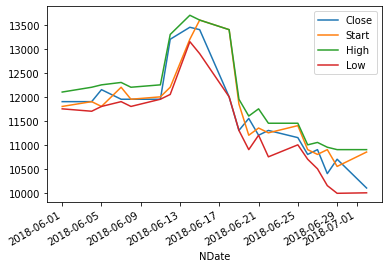

In [3]:
df1.plot()

<AxesSubplot:xlabel='NDate'>

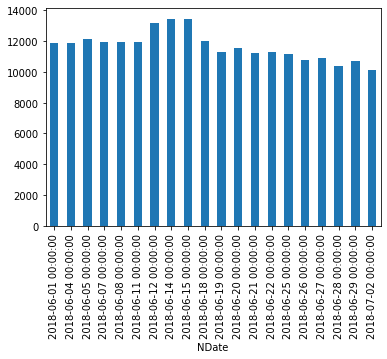

In [6]:
# 막대 그래프
df1.Close[::-1].plot(kind='bar')

<AxesSubplot:xlabel='NDate'>

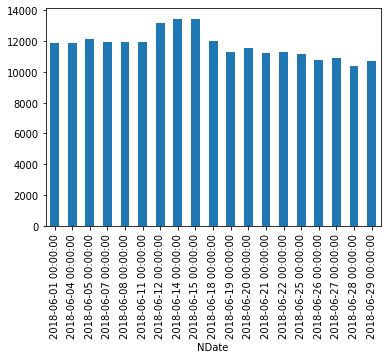

In [9]:
# Q. 6월만을 추출하여 Close 컬럼으로 일별 막대 그래프를 표현하세요.
# df1.Close.loc['2018-06'][::-1].plot(kind='bar')
df1.loc['2018-06','Close'][::-1].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

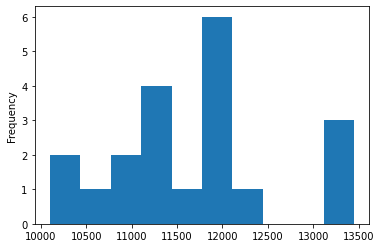

In [14]:
df1.Close.plot(kind='hist', bins=10)

### 과제(7/6-3)

- df에서 Volume 컬럼의 분포를 탐색하는 히스토그램을 표현하세요.

<AxesSubplot:xlabel='Close', ylabel='Volume'>

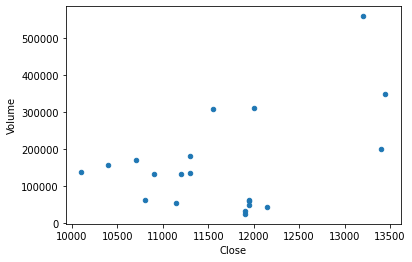

In [16]:
df.plot(x='Close', y='Volume', kind='scatter'  )

In [19]:
df1.corr()

,Close,Start,High,Low
Close,1.000000,0.856181,0.941201,0.946297
Start,0.856181,1.000000,0.961009,0.921467
High,0.941201,0.961009,1.000000,0.945487
Low,0.946297,0.921467,0.945487,1.000000


In [22]:
df1.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

<AxesSubplot:>

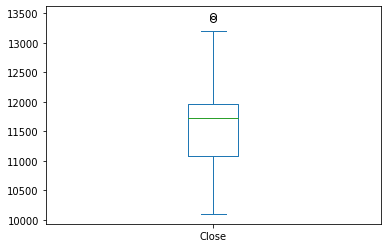

In [21]:
df1.Close.plot(kind='box')